<a href="https://colab.research.google.com/github/Nilavan/Self-driving-car/blob/master/Self_driving_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip /content/drive/MyDrive/self_driving_data/driving_dataset.zip

In [ ]:
#!cp -av "/content/driving_dataset" "/content/drive/MyDrive/self_driving_data/"

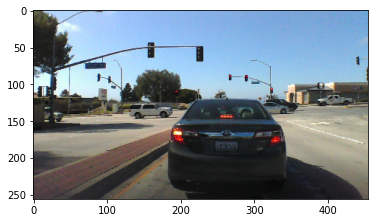

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imread('/content/drive/MyDrive/self_driving_data/driving_dataset/10203.jpg')
plt.imshow(img)
plt.show()

In [5]:
xs = []
ys = []

with open('/content/drive/MyDrive/self_driving_data/driving_dataset/data.txt') as f:
  for line in f:
    xs.append('driving_dataset/'+line.split()[0])
    ys.append(float(line.split()[1]) * 3.14159265 / 180)

num_images = len(xs)
print(xs)

['driving_dataset/0.jpg', 'driving_dataset/1.jpg', 'driving_dataset/2.jpg', 'driving_dataset/3.jpg', 'driving_dataset/4.jpg', 'driving_dataset/5.jpg', 'driving_dataset/6.jpg', 'driving_dataset/7.jpg', 'driving_dataset/8.jpg', 'driving_dataset/9.jpg', 'driving_dataset/10.jpg', 'driving_dataset/11.jpg', 'driving_dataset/12.jpg', 'driving_dataset/13.jpg', 'driving_dataset/14.jpg', 'driving_dataset/15.jpg', 'driving_dataset/16.jpg', 'driving_dataset/17.jpg', 'driving_dataset/18.jpg', 'driving_dataset/19.jpg', 'driving_dataset/20.jpg', 'driving_dataset/21.jpg', 'driving_dataset/22.jpg', 'driving_dataset/23.jpg', 'driving_dataset/24.jpg', 'driving_dataset/25.jpg', 'driving_dataset/26.jpg', 'driving_dataset/27.jpg', 'driving_dataset/28.jpg', 'driving_dataset/29.jpg', 'driving_dataset/30.jpg', 'driving_dataset/31.jpg', 'driving_dataset/32.jpg', 'driving_dataset/33.jpg', 'driving_dataset/34.jpg', 'driving_dataset/35.jpg', 'driving_dataset/36.jpg', 'driving_dataset/37.jpg', 'driving_dataset/38.j

In [12]:
import random

c = list(zip(xs,ys))
random.shuffle(c)
xs,ys = zip(*c)

In [17]:
import cv2

train_xs = xs[:int(len(xs) * 0.8)]
train_ys = ys[:int(len(xs) * 0.8)]

val_xs = xs[-int(len(xs) * 0.2):]
val_ys = ys[-int(len(xs) * 0.2):]

num_train_images = len(train_xs)
num_val_images = len(val_xs)

x_train = []
y_train = []

x_val = []
y_val = []

for i,id in enumerate(train_xs[:100]):
  img = cv2.imread('/content/drive/MyDrive/self_driving_data/'+str(id))
  img = cv2.resize(img[-150:], (200,66))/255

  x_train.append(img)
  y_train.append(train_ys[i])

for i,id in enumerate(val_xs[:100]):
  img = cv2.imread('/content/drive/MyDrive/self_driving_data/'+str(id))
  img = cv2.resize(img[-150:], (200,66))/255

  x_val.append(img)
  y_val.append(val_ys[i])

In [34]:
import numpy as np
np.array(x_train).shape

(100, 66, 200, 3)

In [35]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout
import tensorflow as tf

model = Sequential()

# 5x5 Convolutional layers with stride of 2x2
model.add(Conv2D(24, (5, 5), strides=(2, 2),activation='elu',input_shape=(66,200,3)))
model.add(Conv2D(36, (5, 5), strides=(2, 2),activation='elu'))
model.add(Conv2D(48, (5, 5), strides=(2, 2),activation='elu'))
    
# 3x3 Convolutional layers with stride of 1x1
model.add(Conv2D(64, (3, 3),activation='elu'))
model.add(Conv2D(64, (3, 3),activation='elu'))
    
# Flatten before passing to the fully connected layers
model.add(Flatten())

# Three fully connected layers
model.add(Dense(100,activation='elu'))
model.add(Dropout(.25))
model.add(Dense(50,activation='elu'))
model.add(Dropout(.25))
model.add(Dense(10,activation='elu'))
model.add(Dropout(.25))
    
# Output layer with linear activation 
model.add(Dense(1,activation="linear"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 100)              

In [49]:
model.compile(optimizer='adam', loss="mse")
model.fit(x=np.array(x_train),y=np.array(y_train),epochs=3,validation_data=(np.array(x_val),np.array(y_val)))

Epoch 1/3
4/4 [==============================] - 2s 297ms/step - loss: 0.6650 - val_loss: 0.3437
Epoch 2/3
4/4 [==============================] - 1s 237ms/step - loss: 0.3513 - val_loss: 0.2940
Epoch 3/3
4/4 [==============================] - 1s 229ms/step - loss: 0.4954 - val_loss: 0.3218
